
<a name="T_C9742429"></a>
# <span style="color:rgb(213,80,0)">Gravitational Wave Data Explorer</span>

Authors: Shubo Chakrabarti & Temo Vekua


Copyright 2023, The MathWorks, Inc.

<a name="beginToc"></a>
## Table of Contents
[Introduction](#H_C62AE357)

[Access the data](#H_E6AA057D)

&emsp;[Reading in archive of datafiles using API](#H_4F502ED7)

&emsp;[Plotting the raw (unfiltered) data](#H_5E8AA9CA)

[Analyze the data](#H_A9D20F01)

&emsp;[Apply notch and bandpass filters to remove noise and plot the power spectrum of the filtered data](#H_72F0A615)

&emsp;[Plot the filtered strain data in a 0.3s time-window around the event](#H_B6609CA4)

&emsp;[Make spectrogram of chirp](#H_8626CDBC)

&emsp;[Compute correlation between the two detectors](#H_0C28CA9B)

&emsp;[Plot two signals at two detectors together](#H_205E22A3)

&emsp;[Numerical general relativity data for the first gravitational wave](#H_D8AC7A60)

&emsp;[Comparing detected signals with general relativity simulation for GW150914](#H_E0EE7E13)

[Publish reusable MATLAB code for reproducible results](#H_2C04E455)

[Supporting functions](#H_B7D7561B)

&emsp;[Function to plot strain & the power spectrum ](#H_54BF4935)

&emsp;[Compute and plot the power spectrum of the strain](#H_149DAABD)

&emsp;[Function to apply notch and bandpass filters on strain data](#H_BA39A50C)

[References](#H_23A7CB6A)

[Acknowledgements](#H_E19E0070)

<a name="endToc"></a>
<a name="H_C62AE357"></a>
## Introduction

 **Public Data:** Many public databases have been created for the purposes of making data freely accessible to the scientific community. A best practice is to assign a unique identifier to a dataset, so that it is discoverable. A common form of a unique identifier is a [Digital Object Identifier or DOI](https://en.wikipedia.org/wiki/Digital_object_identifier)® which points to the data.


**Access Public Data:** To access and process public data, you can use several routes.

-  Download data files to your local machine and work with them in MATLAB®.
-  Access data directly via an API. MATLAB's [<samp>webread</samp>](https://www.mathworks.com/help/matlab/ref/webread.html?searchHighlight=webread&s_tid=srchtitle_webread_1) function reads the RESTful API used by many portals.
-  If the portal offers only Python® bindings, [call Python from MATLAB](https://www.mathworks.com/help/matlab/call-python-libraries.html).

**Data formats:** MATLAB supports a wide range of data formats

-  There are a wide range of scientific data formats that can be [natively read in MATLAB](https://www.mathworks.com/help/matlab/scientific-data.html). They include NetCDF and HDF5 as well as more specialized data formats.
-  In addition, MATLAB contains [built-in functions](https://www.mathworks.com/help/matlab/ref/fitsread.html) to read data in specific data formats often used in physics workflows.
-  Sometimes data import functions may be [written by the community](https://www.mathworks.com/matlabcentral/fileexchange/?category%5B%5D=support%2Fsciences1689.support%2Fphysics1260&q=data+read), and published on the MATLAB [File Exchange](https://www.mathworks.com/matlabcentral/fileexchange/) - a portal for community contributions in MATLAB. All community contributions are covered by open source licenses, which means they can be re-used, modified or added to. Exact terms and conditions depend on the licenses used by the author.
-  An example is the code used in this tutorial for strain data exploration and post-processing which follows this [community contribution](https://de.mathworks.com/matlabcentral/fileexchange/108859-gravitationalwavedataexplorer?tab=example&focused=). In compliance with the Open Source License used for this code, the terms of the license are reprinted here.

Copyright (c) 2022, Duncan Carlsmith All rights reserved. Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:


 *<samp> Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.</samp>


 *<samp> Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution</samp>


 *<samp> Neither the name of University of Wisconsin Madison nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.</samp>


<samp>THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.</samp>


In this example, we will access [gravitational wave data](#H_23A7CB6A) from the [GWOSC](https://www.gw-openscience.org/) Open Science database.

<a name="H_E6AA057D"></a>
## Access the data
<a name="H_F95B999A"></a>

We will use the <samp>webread</samp> function to access the metadata using the RESTful API and use  <samp>h5read</samp> function to read data directly from the url.

<a name="H_4F502ED7"></a>
### Reading in archive of datafiles using API

Clear workspace and specify URL endpoints


In [1]:
baseURL = "https://www.gw-openscience.org/";
archive = webread(baseURL+"archive/all/json");


Read the archive of event files and sessions


In [2]:
archive.events

ans = 
    GW200322_091133_v1: [1x1 struct]
    GW200316_215756_v1: [1x1 struct]
    GW200311_115853_v1: [1x1 struct]
     x200311_103121_v1: [1x1 struct]
    GW200308_173609_v1: [1x1 struct]
    GW200306_093714_v1: [1x1 struct]
    GW200302_015811_v1: [1x1 struct]
    GW200225_060421_v1: [1x1 struct]
    GW200224_222234_v1: [1x1 struct]
    GW200220_124850_v1: [1x1 struct]
    GW200220_061928_v1: [1x1 struct]
     x200219_201407_v1: [1x1 struct]
    GW200219_094415_v1: [1x1 struct]
    GW200216_220804_v1: [1x1 struct]
     x200214_224526_v1: [1x1 struct]
     x200214_224526_v2: [1x1 struct]
    GW200210_092254_v1: [1x1 struct]
    GW200209_085452_v1: [1x1 struct]
    GW200208_222617_v1: [1x1 struct]
    GW200208_130117_v1: [1x1 struct]
    GW200202_154313_v1: [1x1 struct]
     x200201_203549_v1: [1x1 struct]
    GW200129_065458_v1: [1x1 struct]
    GW200128_022011_v1: [1x1 struct]
     x200121_031748_v1: [1x1 struct]
           GW200115_v1: [1x1 struct]
    GW200115_042309_v2: [1x1 st


Get event names


In [3]:
eventNames = string(fieldnames(archive.events));


Select a given event


In [4]:
selectedEvent = eventNames(177);
eventName = extractBefore(selectedEvent,"_v");
version = "v"+extract(selectedEvent,strlength(selectedEvent));

<a name="H_A5529E6E"></a>
### Accessing metadata of selected event via API calls using <samp>webread</samp>

Query the selected event


In [5]:
metadataEvent = webread(baseURL+"eventapi/json/event/"+erase(eventName,'x')+"/"+version);


Show contents of the json


In [6]:
metadataEvent.events.(selectedEvent)

ans = 
                          commonName: 'GW150914'
                             version: 3
                   catalog_shortName: 'GWTC-1-confident'
                                 GPS: 1.1263e+09
                          gracedb_id: 'G184098'
                           reference: 'https://doi.org/10.7935/82H3-HH23'
                             jsonurl: 'https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3'
                       mass_1_source: 35.6000
                 mass_1_source_lower: -3.1000
                 mass_1_source_upper: 4.7000
                  mass_1_source_unit: 'M_sun'
                       mass_2_source: 30.6000
                 mass_2_source_lower: -4.4000
                 mass_2_source_upper: 3
                  mass_2_source_unit: 'M_sun'
          network_matched_filter_snr: 26
    network_matched_filter_snr_lower: -0.2000
    network_matched_filter_snr_upper: 0.1000
     network_matched_filter_snr_unit: ''
                 luminosity_distance: 440

In [7]:
time_Event=metadataEvent.events.(selectedEvent).GPS

time_Event = 1.1263e+09


Show contents of the strain field


In [8]:
strainTable = struct2table(metadataEvent.events.(selectedEvent).strain);


Convert text to string:


In [9]:
strainTable.detector = string(strainTable.detector);
strainTable.format = categorical(strainTable.format);
strainTable.url = string(strainTable.url);
strainTable


Filter the table for only hdf5 files


In [10]:
hdf5Table = strainTable(strainTable.format == "hdf5",:)

<a name="H_EFFABCEB"></a>
### Use <samp>h5read</samp> within <samp>webread</samp> to read HDF5 data directly from the URL

Select data to call (32 secs AND 4kHz sampling rate AND H1 or L1 detectors)


In [11]:
SF=4096;
available_detector_names=unique(hdf5Table.detector);
selectedDataset = hdf5Table(hdf5Table.duration == 32 & ...
                  hdf5Table.sampling_rate == SF & hdf5Table.detector == available_detector_names(1),:)


The HDF5 file can be downloaded by entering the URL (in the last column of <samp>selectedDataset</samp> table) in the browser. However, we will not dowload the data, instead we will use <samp>h5read</samp> inside the <samp>webread</samp> function to read in data directly from the URL.


In [12]:
options = weboptions("ContentReader",@(x) h5read(x,"/strain/Strain"));
data = webread(selectedDataset.url,options);

<a name="H_5E8AA9CA"></a>
### Plotting the raw (unfiltered) data

Data just read is a time series data corresponding to unfiltered strain registered at one of the LIGO detectors. We normalize strain data and scale it to sensible values rather than 0.001 fm in 1 km.



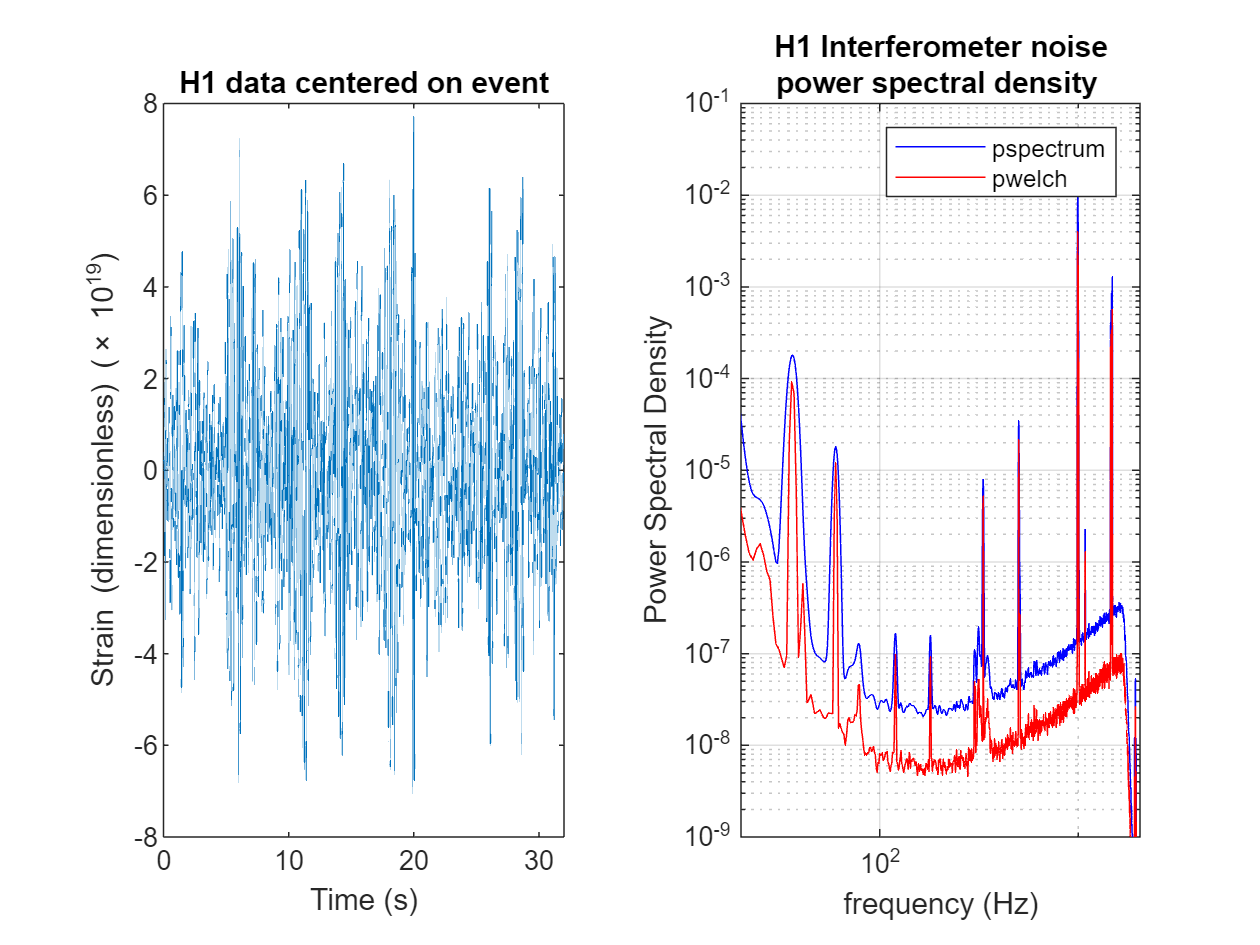

In [13]:
figure
strain=(data-mean(data))*10^(19);
fs=selectedDataset.sampling_rate;
plotData(strain,fs,selectedDataset.detector)

<a name="H_A9D20F01"></a>
## Analyze the data
<a name="H_62441725"></a>
### Find noise peaks in the power spectrum using peak finder <samp>findpeaks</samp>

In [14]:
[p,~]=pspectrum(strain,fs);
q=10*log10(p);


Require peak height of 10 and sort in descending order of importance/height. We catch the peak values <samp>pks</samp>, locations <samp>locs</samp>, widths <samp>w</samp>, and prominences <samp>prom</samp>.


Call <samp>findpeaks</samp> again without collecting results to make a plot.



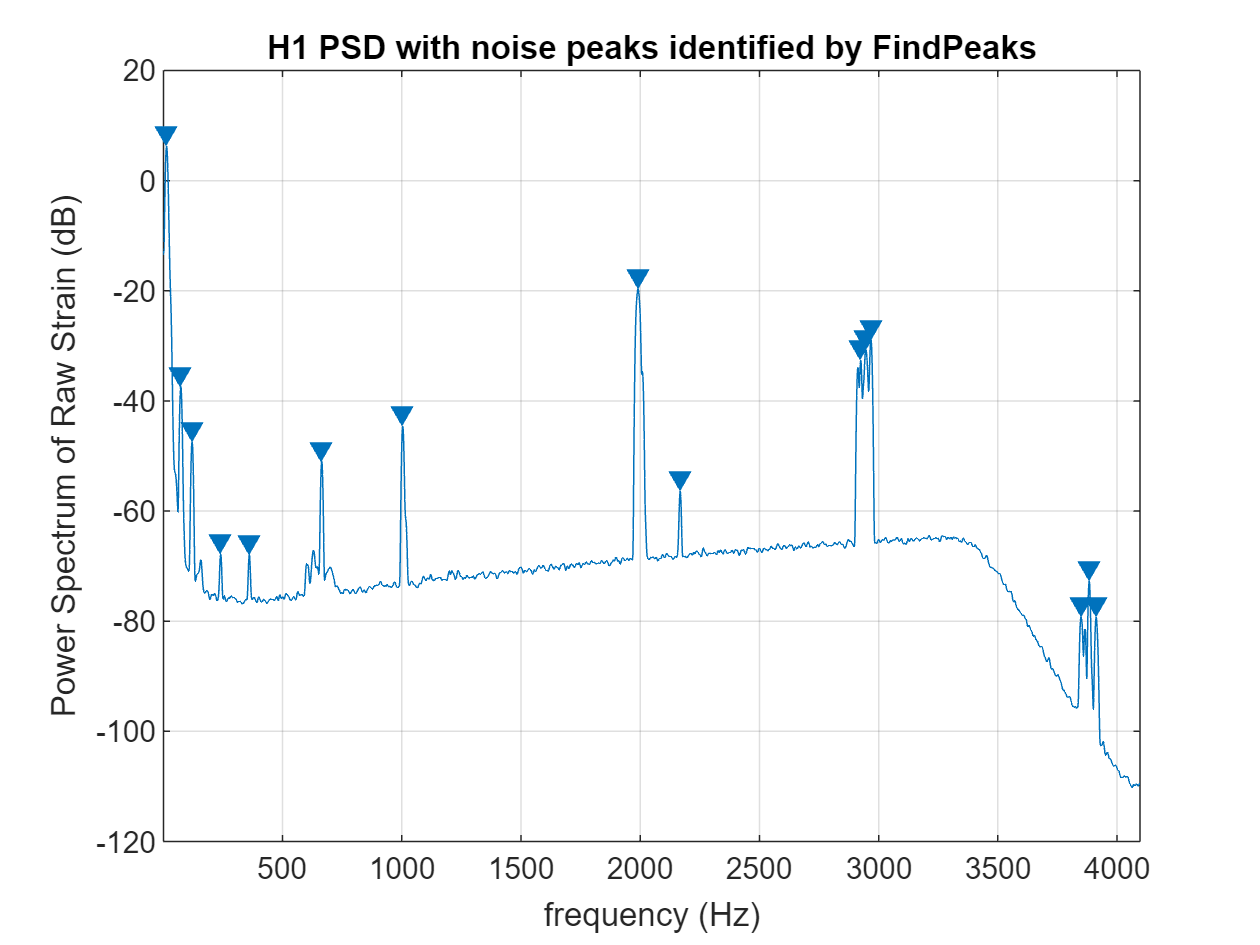

In [15]:
figure
findpeaks(q,MinPeakProminence=5, SortStr='descend');
title(strcat(selectedDataset.detector,' PSD with noise peaks identified by FindPeaks'));
xlabel('frequency (Hz)');
ylabel('Power Spectrum of Raw Strain (dB)');

<a name="H_72F0A615"></a>
### Apply notch and bandpass filters to remove noise and plot the power spectrum of the filtered data

We will next apply notch and bandpass filter with lower limit 35Hz and upper limit 350Hz (corresponding to the relevant frequency range for detecting first gravitational wave by the LIGO detectors) as in published analysis [[1](#M_05D74886)].  A notch filter suppresses frequencies within a narrow range and we apply it to remove various peaks previously found, since most pronounced peaks most likely correspond to noise that we would like to remove. See function [<samp>filterSignal</samp>](#H_0BD4A742) at the end of this script.



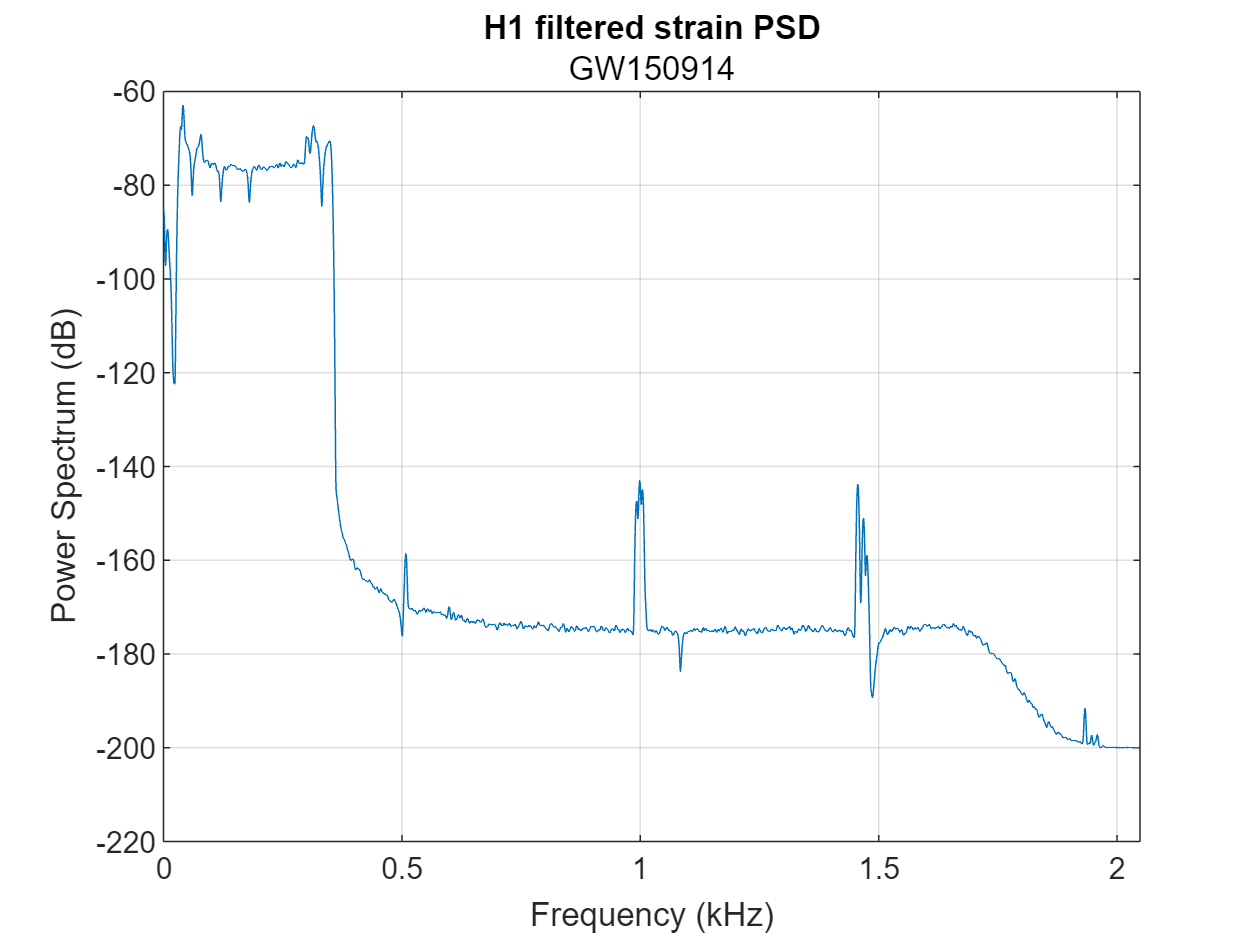

In [16]:
strainfilt=filterSignal(strain,fs);
figure
pspectrum(strainfilt,fs);
title(selectedDataset.detector+' filtered strain PSD');
subtitle(eventName)

<a name="H_B6609CA4"></a>
### Plot the filtered strain data in a 0.3s time-window around the event

Standard deviation of the strain signal.


In [17]:
strainsig=std(strainfilt)

strainsig = 0.0034


Create a 0.3s time window around published time near the center of the 32 s long signal,


In [18]:
tstart=time_Event-selectedDataset.GPSstart-0.15;
tend=tstart+0.3;
time=(1:length(strain))/fs;
time=time';


Make initial mask to drop endpoints and glitches from data.


In [19]:
mask=time<tend & time>tstart & strainfilt<3*strainsig & strainfilt>-3*strainsig;


Plot the raw and filtered subsamples.



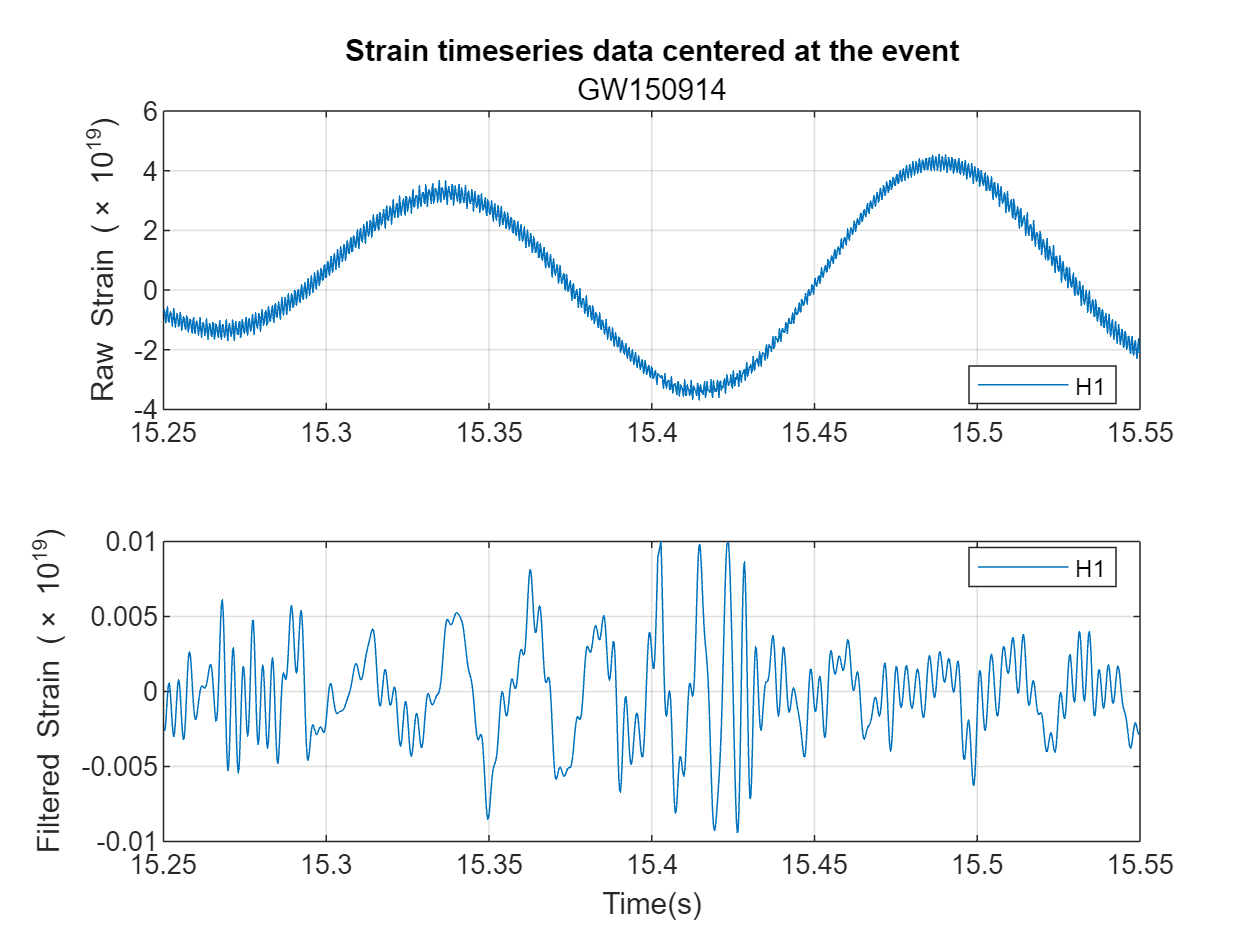

In [20]:
figure
tiledlayout(2,1);
nexttile
plot(time(mask),strain(mask))
ylabel('Raw Strain (\times 10^{19})')
title("Strain timeseries data centered at the event")
subtitle(eventName)
legend(selectedDataset.detector,Location='best')
grid on
nexttile
plot(time(mask),strainfilt(mask))
xlabel('Time(s)')
ylabel('Filtered Strain (\times 10^{19})')
legend(selectedDataset.detector,Location='best')
grid on

<a name="H_8626CDBC"></a>
### Make spectrogram of chirp

As the black holes inspiral and orbit faster and faster before merging in one black hole, the frequency of the gravitational radiation increases. A spectrogram exhibits the time variation of a power spectrum. At any given time, the spectrum is derived from window around that time. We will obtain a time-frequency representation of the filtered strain data, showing the signal frequency increasing over time.


Make a spectrogram using <samp>pspectrum</samp> with the specifier 'spectrogram' that shows the chirp of frequency.  Specify to a time window width over which to calculate the spectrum, a width small compared to the duration of the signal, and a large fractional overlap of successive windows.



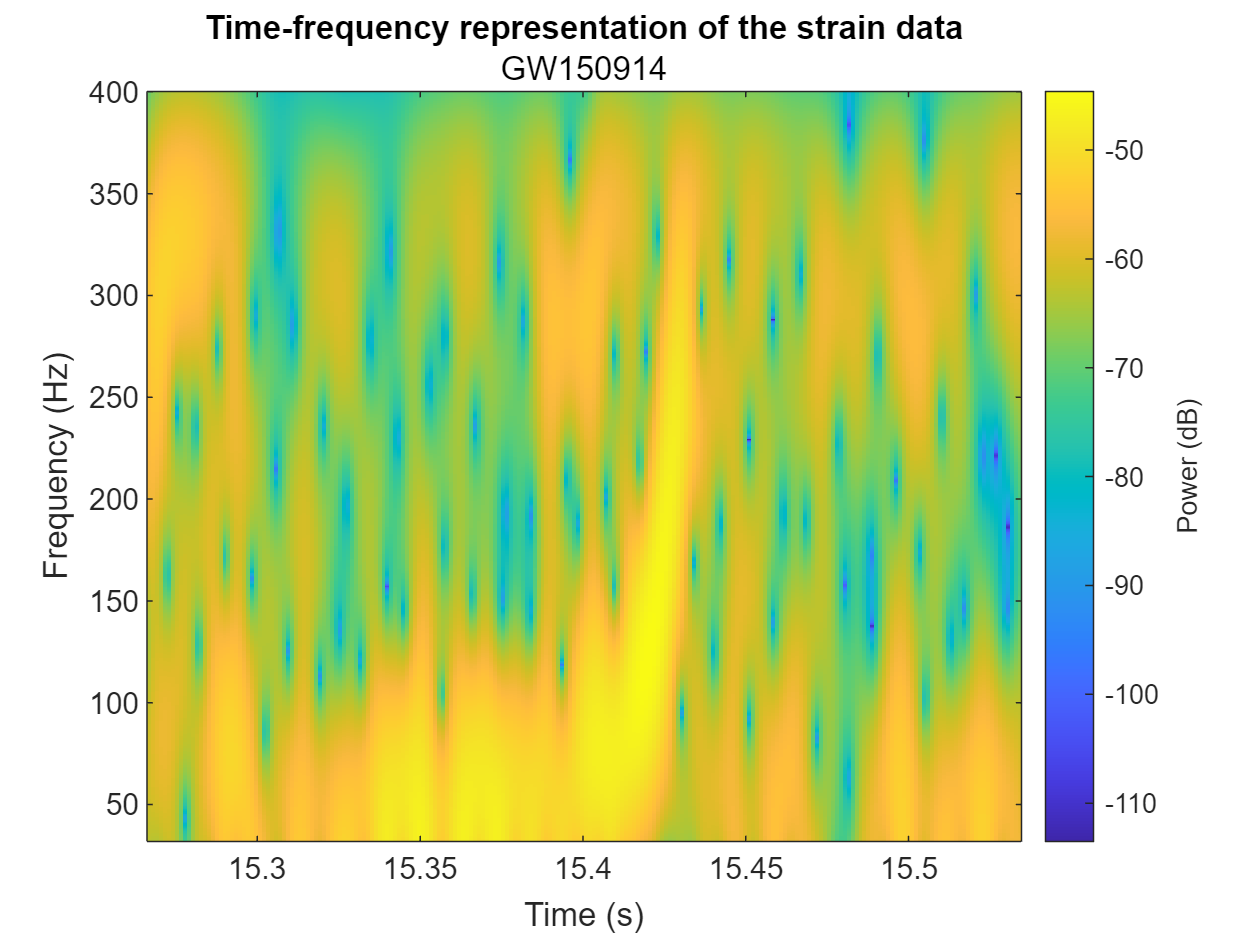

In [21]:
figure
pspectrum(strainfilt(mask),time(mask),'spectrogram',FrequencyLimits=[32,400], ...
    TimeResolution=0.033,OverlapPercent=97,Leakage=0.5);
title("Time-frequency representation of the strain data")
subtitle(eventName)

In [22]:
%text(time_Event-selectedDataset.GPSstart+0.015,250,strcat(selectedDataset.detector,' chirp \rightarrow'),HorizontalAlignment='right');


The chirp is most evident as the rising band between frequencies 50Hz to 300Hz.

<a name="H_0C28CA9B"></a>
### Compute correlation between the two detectors

Let's bring in the strain data from the same gravitational wave event, but from another interferometer, into data2 variable and filter out signal as we did above.


In [23]:
switch selectedDataset.detector
    case 'H1'
        selectedDataset2 = hdf5Table(hdf5Table.duration == 32 & hdf5Table.sampling_rate == SF & hdf5Table.detector=='L1',:);
        if isempty(selectedDataset2.detector)
            selectedDataset2 = hdf5Table(hdf5Table.duration == 32 & hdf5Table.sampling_rate == SF & hdf5Table.detector=='V1',:);
        end
    otherwise
        selectedDataset2 = hdf5Table(hdf5Table.duration == 32 & hdf5Table.sampling_rate == SF & hdf5Table.detector=='H1',:);
end

data2= webread(selectedDataset2.url,options);
strain2=(data2-mean(data2))*10^(19);
strain2filt=filterSignal(strain2,fs);


Now we calculate correletion between the two filtered signals at two LIGO interferometers separated by ~3,000km straight line distance from each other.


In [24]:
[acor,lag] = xcorr(strainfilt(mask),strain2filt(mask));


Find the maximum in the correlation and the corresponding time difference.


In [25]:
[~,I] = max(abs(acor));
lagDiff = lag(I);
timeDiff = lagDiff/fs

timeDiff = 0.0073


The time lag of $\sim 7$ ms for the event GW150914 is within the range of the quoted value of $6.9_{-0.4}^{+0.5}$ ms [[1](#M_05D74886)].


Detection of the signal separately by each of the two LIGO detectors (both of which compare favorably with the simulated strain from general relativity shown below), within a time window of $\pm 10$ ms was crucial to claim the first ever direct experimental observation of the gravitational wave.



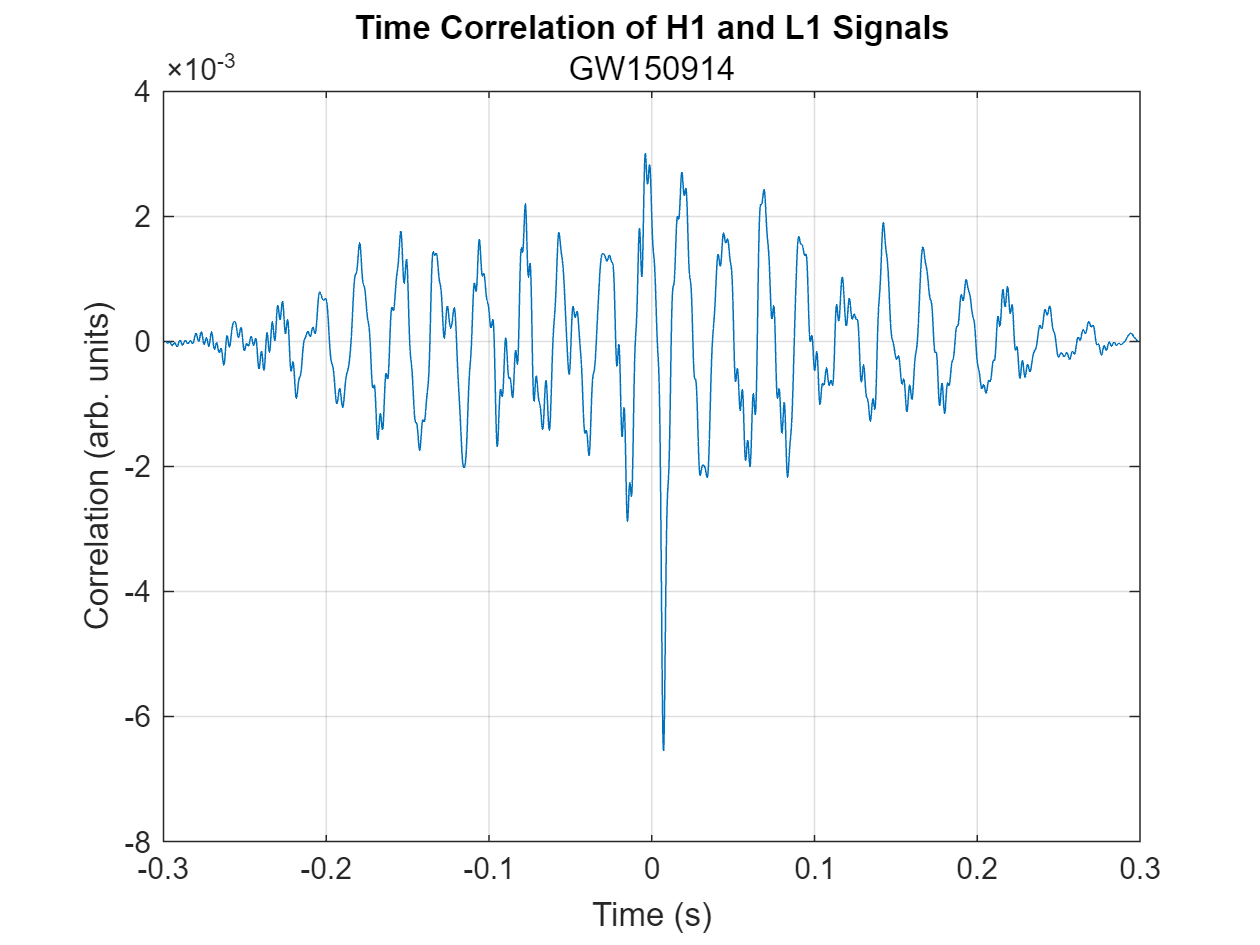

In [26]:
figure
plot(lag/fs,acor)
title('Time Correlation of '+selectedDataset.detector +' and '+selectedDataset2.detector +' Signals'  )
subtitle(eventName)
xlabel('Time (s)');
ylabel('Correlation (arb. units)')
grid on

<a name="H_205E22A3"></a>
### Plot two signals at two detectors together

For comparing two signals with each other, following LIGO collaboration result [[1](#M_05D74886)], we multiply one of the filtered strains with  <samp>sign(acor(I))</samp> and add time lag to it.



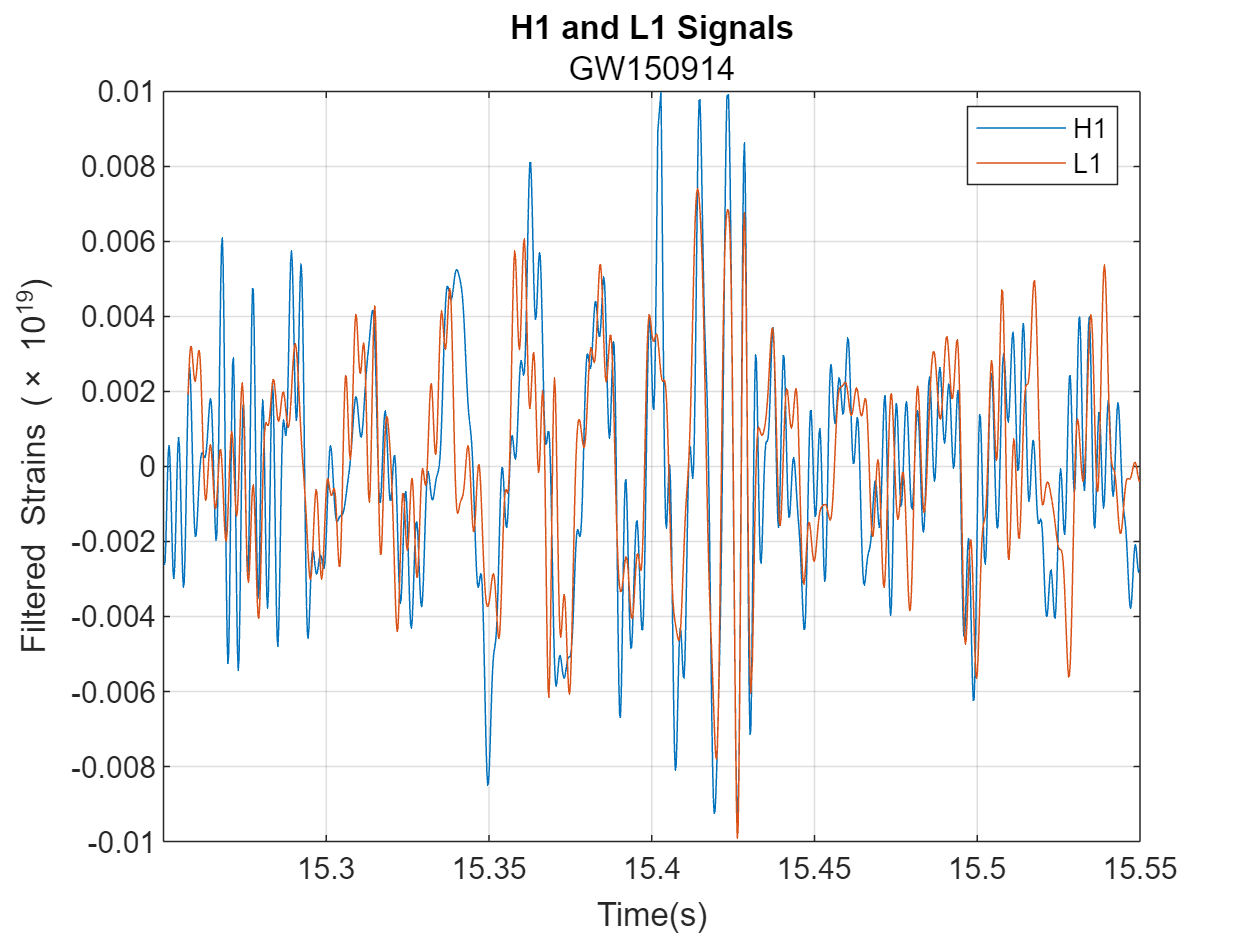

In [27]:
plot(time(mask),strainfilt(mask),time(mask)+timeDiff,sign(acor(I))*strain2filt(mask))
xlabel('Time(s)')
ylabel('Filtered Strains (\times 10^{19})')
title(selectedDataset.detector +' and '+selectedDataset2.detector +' Signals')
subtitle(eventName)
xlim([tstart,tend])
legend(selectedDataset.detector,selectedDataset2.detector,Location='best');
grid on


A peak gravitational-wave strain is $\sim 1.0\times 10^{-21}$ (strain falls like $1/r$ , where $r$ is distance to the source of the event), whereas the raw (unfiltered) strain data has orders of magnitude $\sim 1.0\times 10^{-18}$ larger fluctuations. Hence signal is much weaker than noise.

<a name="H_D8AC7A60"></a>
### Numerical general relativity data for the first gravitational wave

In addition to the measured data, GWOSC provides users with the general relativity simulation data for the strain, waveform that matches best measured strain data of GW150914 event. Physicists knew exactly what they were looking for well before the gravitational wave discovery. It was anticipated that inspiraling compact binaries will become standard sirens and invaluable tool for cosmology when we enter the gravitational-wave detection era.


The waveform that we read from GWOSC portal and plot below represents a gravitational wave emanating from the inward spiral and merger of a pair of black holes of 36 and 29 solar masses (1.3 billion light-years away) and the subsequent "ringdown" of the single resulting black hole.


In [28]:
if eventName=="GW150914"
    GR_text = webread(baseURL+"/GW150914data/P150914/fig2-unfiltered-waveform-H.txt");
    GR_strain = str2num(GR_text(1,43:end));
    GR_strain(:,2)=GR_strain(:,2)*1e-2; % data is in 10^(-21)m we adjust it to 10^(-19)m
    t_shift=0.007;
    if selectedEvent=="GW150914_v1"
        t_shift=0.005;
    end
    tstart_GR=tstart-t_shift; % adjust start time of the simulated event to match the measured strain data in GW150914_v1, v2 and v3
    tend_GR=tstart_GR+GR_strain(end,1)-GR_strain(1,1);
    GR_strain(:,1)=linspace(tstart_GR,tend_GR,size(GR_strain,1));

    plot(GR_strain(:,1),GR_strain(:,2))
    subtitle(eventName)
    xlabel('Time(s)')
    ylabel('GR simulated strain (\times 10^{19})')
    xlim([tstart,tend])
    title('Numerical Relativity Inspiral-Merger-Ringdown Waveform')
    grid on


Next calculate a spectrogram of simulated waveform.



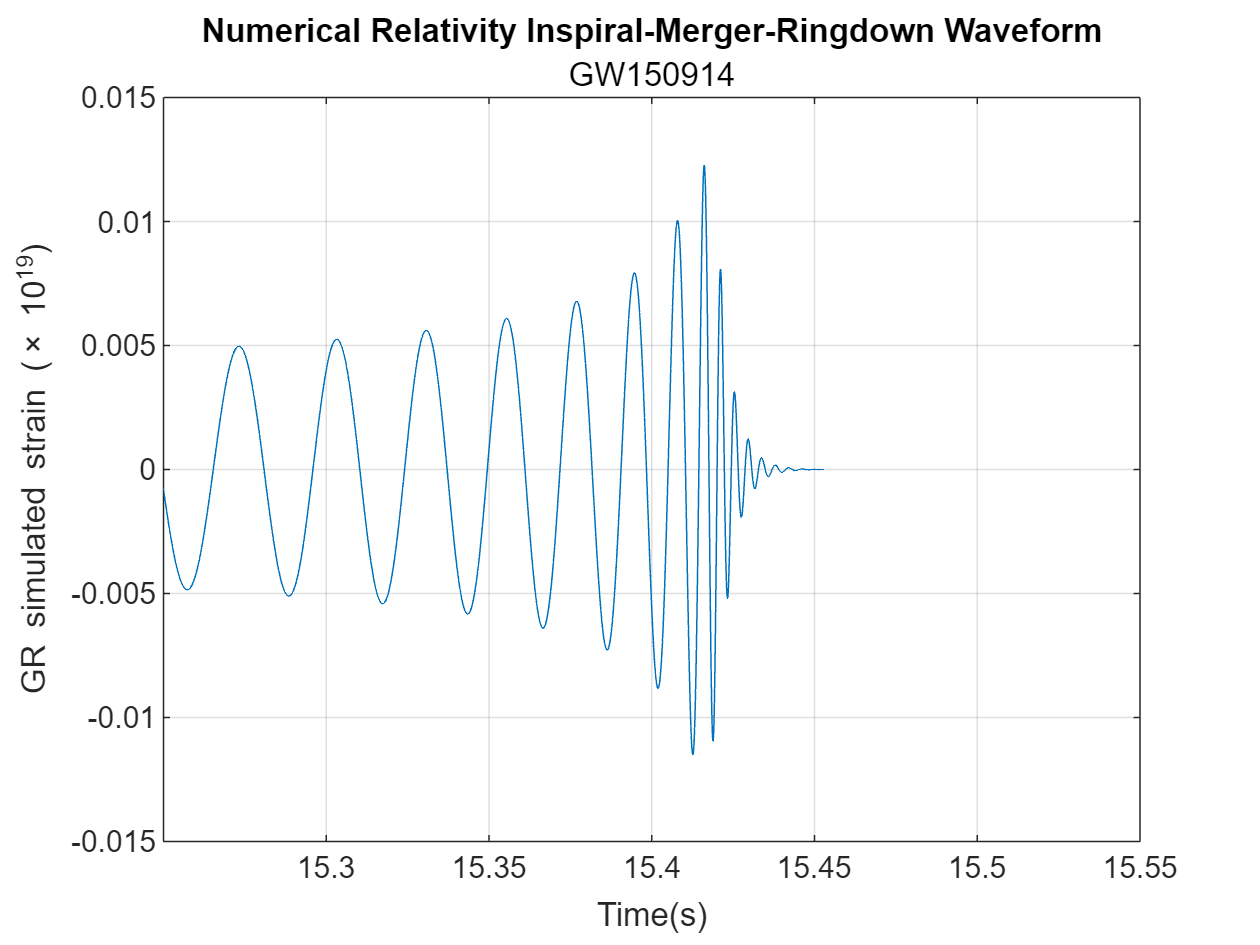

In [29]:
    figure
    pspectrum(GR_strain(:,2),GR_strain(:,1),'spectrogram',FrequencyLimits=[32,400],...
              TimeResolution=0.033,OverlapPercent=95,Leakage=0.5);
    title("Time-frequency representation of the simulated strain")
    subtitle(eventName)
end

<center>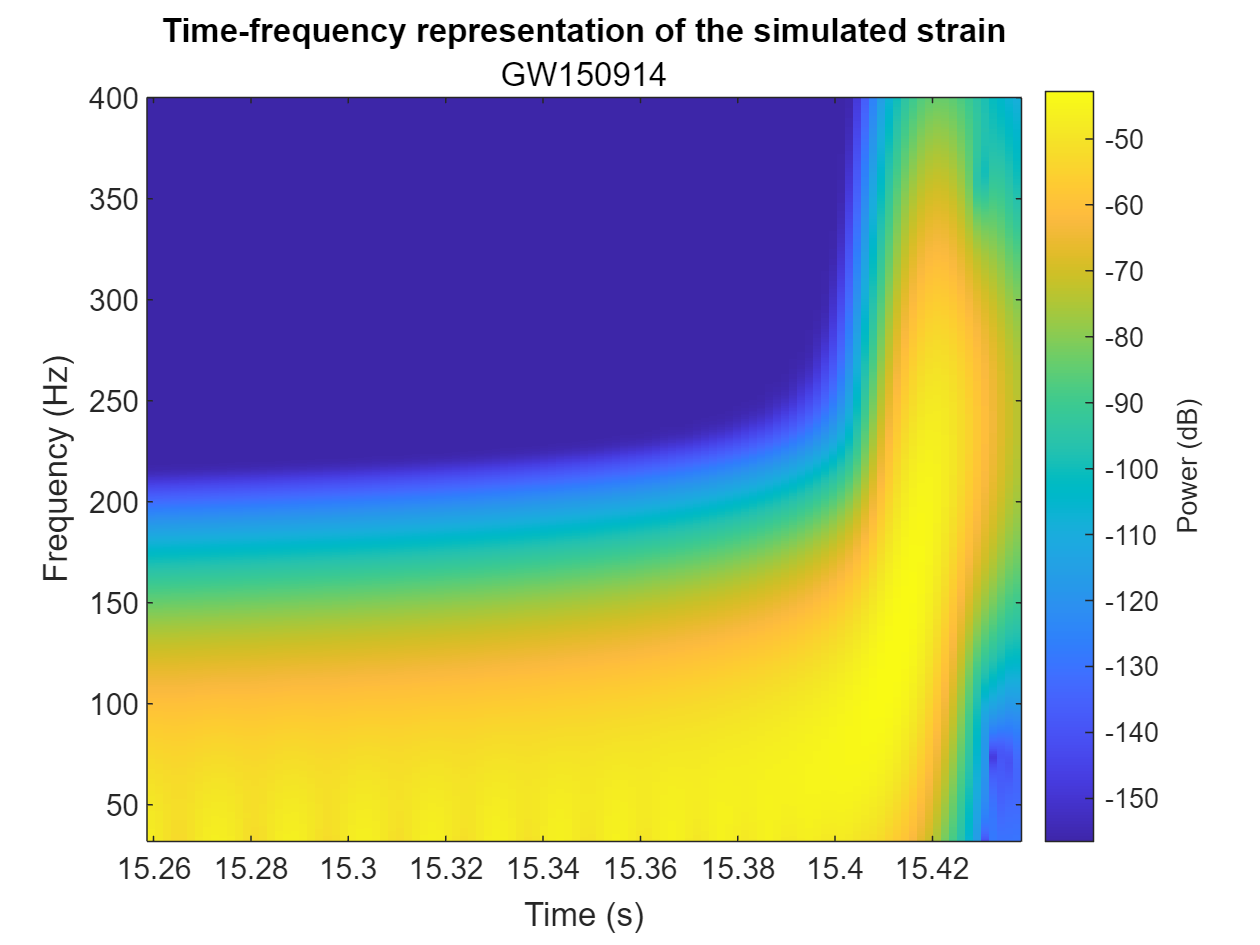</center>

<a name="H_E0EE7E13"></a>
### Comparing detected signals with general relativity simulation for GW150914

Finally, we compare two detected signals with simulated one.


In [30]:
if eventName=="GW150914"
    if selectedDataset.detector=="L1"
        delta1=0;
        delta2=timeDiff;
        s1=-1;
        s2=1;
    elseif selectedDataset.detector=="H1"
        delta1=timeDiff;
        delta2=0;
        s1=1;
        s2=-1;
    end

    tiledlayout(2,1)
    nexttile
    plot(time(mask)-delta1,s1*strainfilt(mask))
    hold on
    plot(GR_strain(:,1),GR_strain(:,2))
    title("Comparing GR Simulation of Strain with Observed Filtered Data")
    subtitle(eventName)
    ylabel('Strain (\times 10^{19})')
    legend([selectedDataset.detector + ' Observation','Simulation'],Location="best")
    xlim([tstart,tend])
    grid on

    nexttile
    plot(time(mask)+delta2,s2*strain2filt(mask))
    hold on
    plot(GR_strain(:,1),GR_strain(:,2))
    legend([selectedDataset2.detector+" Observation","Simulation"],Location="best")
    xlabel('Time(s)')
    ylabel('Strain (\times 10^{19})')
    xlim([tstart,tend])
    grid on
end


Signals detected at both L1 and H1 observatories, compare favorably with the simulated waveform of Inspiral-Merger-Ringdown of binary black hole system.

<a name="H_2C04E455"></a>
## Publish reusable MATLAB code for reproducible results
<a name="H_8025316E"></a>

To enable collaboration partners, reviewers and the community reuse your MATLAB code and reproduce your results.

-  Publish your MATLAB code (eg: on GitHub) and generate a [DOI](https://en.wikipedia.org/wiki/Digital_object_identifier) (digital object identifier) by [linking it to a DOI generating portal](https://docs.github.com/en/repositories/archiving-a-github-repository/referencing-and-citing-content)(egs. [Figshare](https://help.figshare.com/article/how-to-connect-figshare-with-your-github-account#:~:text=You%20can%20get%20set%20up,where%20you'll%20authorise%20figshare.)®, [Zenodo](https://docs.github.com/en/repositories/archiving-a-github-repository/referencing-and-citing-content)®). Make your research output findable by including as much information as needed in the metadata. Document your code well explaining steps required to reproduce clearly and explicitly.
-  Make sure you include a license for your code that specifies reuse and re-distribution rights for the code. Various open source licenses are [available](https://opensource.org/licenses/). BSD, MIT and Apache licenses are commonly used for open research software.
-  [Link your GitHub repository to File Exchange](https://www.mathworks.com/matlabcentral/content/fx/about.html?s_tid=gn_mlc_fx_help#Why_GitHub) to make your MATLAB code available to MATLAB users via the Add-Ons button.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 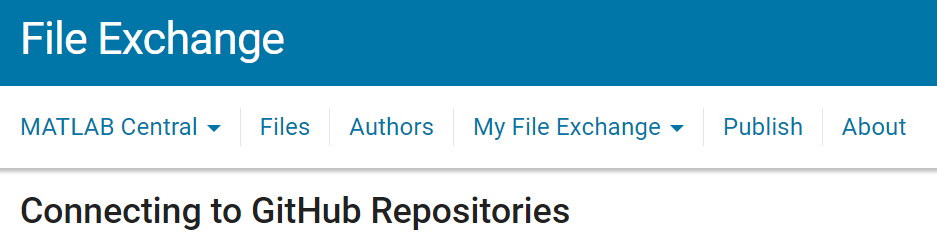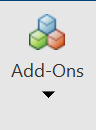

-  Make your MATLAB code **interoperable**. MATLAB is [interoperable](https://www.mathworks.com/products/matlab/matlab-and-other-programming-languages.html) with several other languages including C, Fortran and Python. MATLAB can be directly called from Python using the [MATLAB Engine for Python](https://www.mathworks.com/help/matlab/matlab-engine-for-python.html)® which is available as a PyPI® package and can be installed using the command <samp>pip install matlab.engine</samp> from Python. MATLAB code can also be [packaged as a Python library](https://www.mathworks.com/help/compiler_sdk/gs/create-a-python-application-with-matlab-code.html) and called from Python. Deep Learning models from other frameworks are [interoperable with MATLAB](https://www.mathworks.com/help/deeplearning/ug/interoperability-between-deep-learning-toolbox-tensorflow-pytorch-and-onnx.html) either using the [ONNX™ interface](https://www.mathworks.com/matlabcentral/fileexchange/67296-deep-learning-toolbox-converter-for-onnx-model-format) or via direct interfaces that exist, for example, for Pytorch® and Tensorflow™ models.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 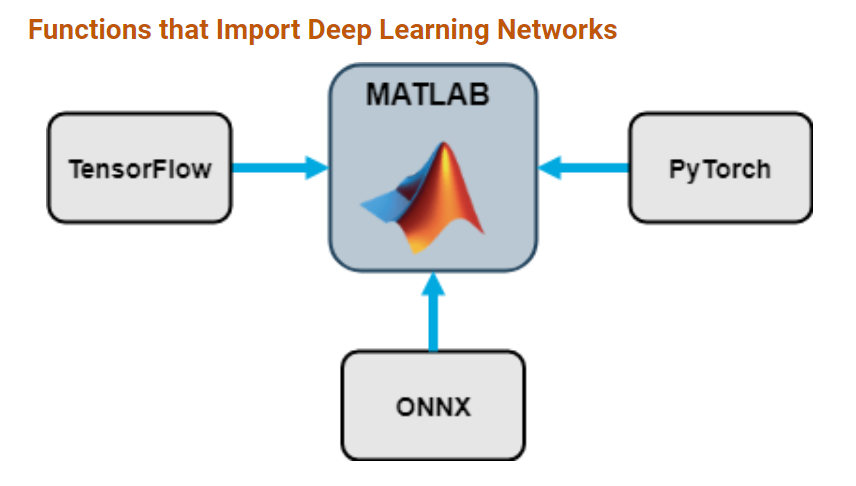

-  MATLAB is interoperable with cloud architectures such as [JupyterHub](https://www.mathworks.com/products/reference-architectures/jupyter.html)® and MATLAB code can also be used within Jupyter Notebooks. Here is a link to a Jupyter® notebook of the same example used here. There is an official MATLAB kernel for Jupyter Notebooks - read about it [here](https://blogs.mathworks.com/matlab/2023/01/30/official-mathworks-matlab-kernel-for-jupyter-released/). To easily convert a Live Script into a Jupyter Notebook use the <samp>export</samp> function.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 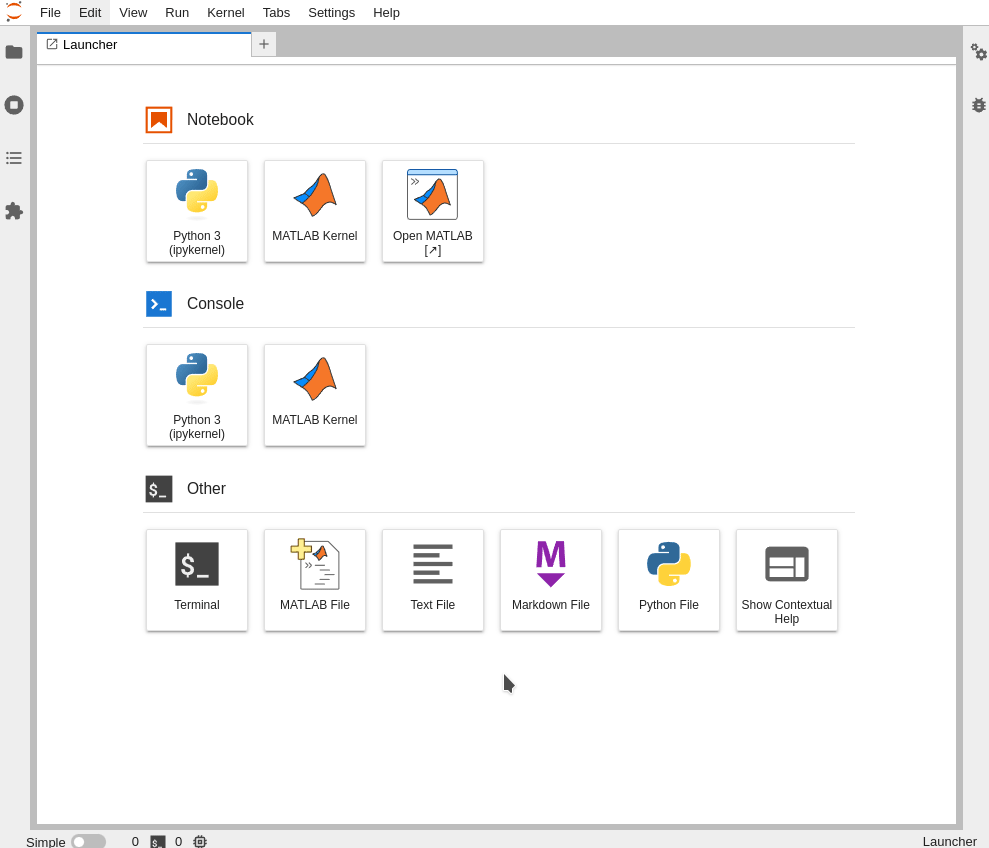

-  Run your [MATLAB code on the browser directly from GitHub](https://www.mathworks.com/help/matlab/matlab_env/open-github-repositories-in-matlab-online.html). Copy and paste the GitHub repo address into [this app](https://www.mathworks.com/products/matlab-online/git.html). That will generate a command, which when pasted into your README, will create a "Open in MATLAB Online™" button on your GitHub repository. By clicking on this button, users will be able to run your code in the browser on MATLAB Online.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 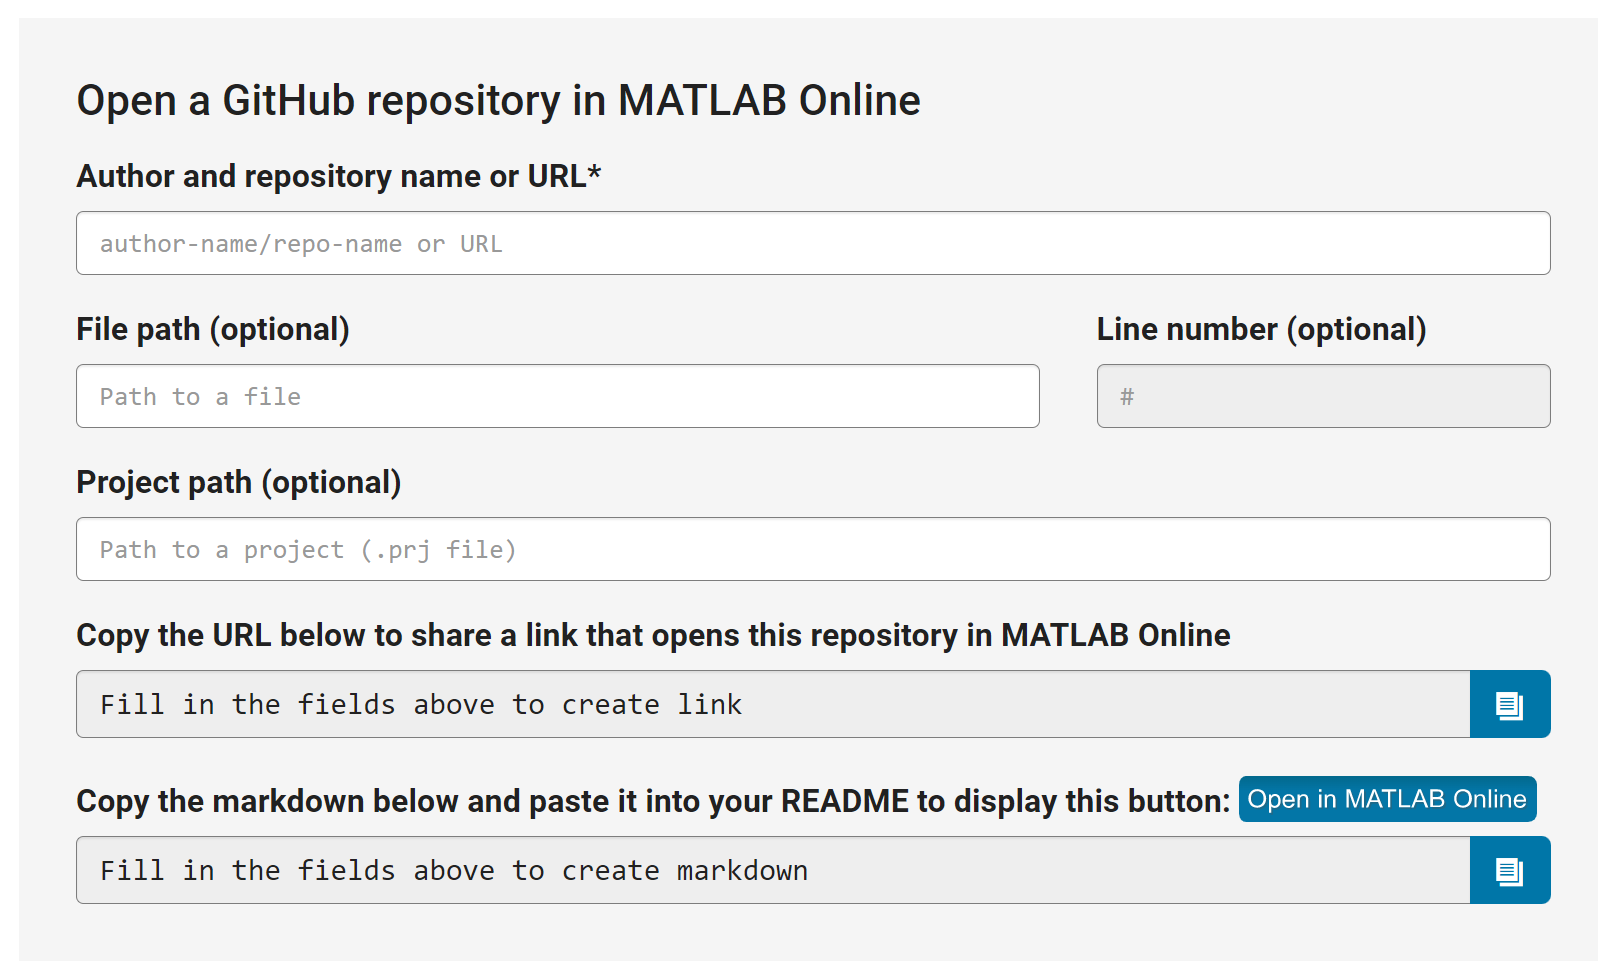

-  Make your MATLAB code reproducible by using a reproducibility portals that supports MATLAB. One example is Code Ocean®. On Code Ocean, you can [upload your MATLAB code](https://help.codeocean.com/en/articles/1120384-which-toolboxes-are-included-with-matlab) including dependencies. Once uploaded, your code is tested and published as a Code Ocean "capsule" which can be run online or downloaded and run locally by users. Code Ocean also generates a DOI for your code capsule.  For Live Scripts, convert the <samp>.mlx</samp> file into a <samp>.m</samp> file and a <samp>.html</samp> file using the [<samp>export</samp>](https://de.mathworks.com/help/matlab/ref/export.html) function for best results. Here is the DOI for the Code Ocean capsule of the this code. Read more about MATLAB on Code Ocean [here](https://blogs.mathworks.com/loren/2021/07/15/sharing-and-running-matlab-code-in-the-cloud/#H_795BB86B).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 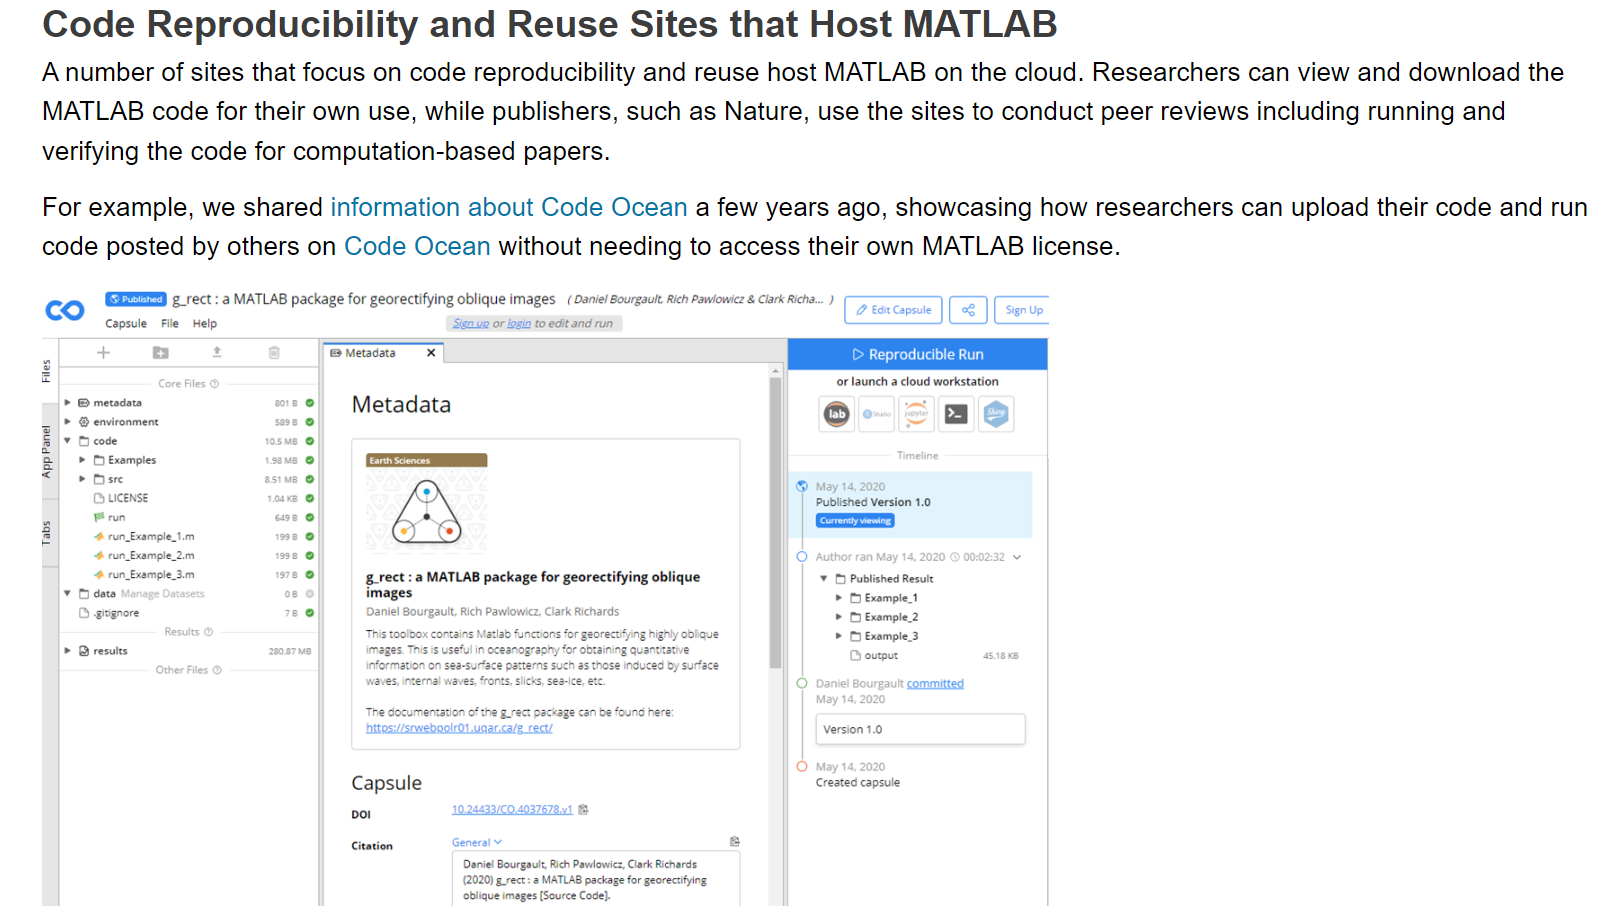

-  **Warning**: Before making your code available on the cloud, <u>make sure all dependencies including any data that is needed for your code to run is uploaded along with the code</u>. Also make sure any <u>path and/or filenames that refer to local directories are appropriately renamed</u>.
-  FAIR standards: FAIR is an acronym that stands for **F**indable, **A**ccessible, **I**nteroperable and **R**eproducible. It is an [accepted standard](https://www.nature.com/articles/s41597-022-01710-x) for research output (code, data) and is often required for your research results to be in [compliance with "Open Science" standards](https://research-and-innovation.ec.europa.eu/strategy/strategy-2020-2024/our-digital-future/open-science_en). Adhering to the above pointers helps in making your MATLAB code FAIR

<a name="H_B7D7561B"></a>
## Supporting functions
<a name="H_54BF4935"></a>
### Function to plot strain & the power spectrum

In [31]:
function plotData(strain,fs,detectorname)
    time=(1:length(strain))/fs;    time=time';
    tiledlayout(1,2);
    nexttile
    plot(time,strain)
    xlabel('Time (s)');
    xlim([0 32])
    ylabel('Strain (dimensionless) (\times 10^{19})');
    title(detectorname+" data centered on event")

<a name="H_149DAABD"></a>
### Compute and plot the power spectrum of the strain

Compute the power spectral density (psd) using pspectrum. This function performs an FFT with a default smoothing window. See MATLAB pspectrum documentation, [https://en.wikipedia.org/wiki/Spectral_density_estimation](https://en.wikipedia.org/wiki/Spectral_density_estimation), and [https://en.wikipedia.org/wiki/Window_function](https://en.wikipedia.org/wiki/Window_function). We supply strain vector and sampling frequency and catch power p and frequency f.


In [32]:
    [p,f]=pspectrum(strain,fs);


LIGO's analysis uses a welch power spectral density (psd). Compute a welch psd using MATLAB function <samp>pwelch</samp> and overlay to compare with <samp>pspectrum</samp> default smoothing.


In [33]:
    [psdL,freqL] = pwelch(strain,hann(fs),fs/2,fs,fs);


Power spectra span a wide range of frequencies and magnitudes. Use loglog to display.


In [34]:
    nexttile
    loglog(f, p,'b');           % plot power versus frequency for pspectrum


Set frequency limits for psd plot. The interferometers are most sensitive in the low audible range.


In [35]:
    xlim([20, 2048]);
    hold on


Overlay power versus frequency for pwelch


In [36]:
    loglog(freqL, psdL,'r')
    ylim([1.e-9, .1])
    grid on
    xlabel('frequency (Hz)');
    ylabel('Power Spectral Density')
    title({detectorname+ ' Interferometer noise', 'power spectral density '});
    legend('pspectrum','pwelch')
end

<a name="H_BA39A50C"></a>
### Function to apply notch and bandpass filters on strain data

In [37]:
function strainfilt=filterSignal(strain,fs)
    [p,f]=pspectrum(strain,fs);
    q=10*log10(p);
    [pks,locs,w,~] = findpeaks(q,MinPeakProminence=5,SortStr='descend');


A notch filter suppresses frequencies within a narrow range. For an example, see [https://www.mathworks.com/help/signal/ug/remove-the-60-hz-hum-from-a-signal.html](https://www.mathworks.com/help/signal/ug/remove-the-60-hz-hum-from-a-signal.html).


Apply notch filters to remove various peaks previously found. Note the peaks were found before the band pass filter was applied so peak locations and widths near band edges were properly identified.


The notch filters have a central frequency and a width for half power. The peak finding gives a central frequency specified by <samp>locs</samp> and a width  <samp>w</samp> which refers to the base of the peak.


In [38]:
    for i = 1:length(pks) % loop over peaks in the psd
        fc=f(locs(i)); % frequency of the peak
        f1=fc-w(i)/6;
        f2=fc+w(i)/6; % use fraction of base width
        if f1<0
           f1=w(i)/24;
        end


Create a correspondiong notch filter. A notch filter has some shape. We use a "2nd order" filter with relatively sharp edges. The shape is selected and the filter created using [designfilt](https://www.mathworks.com/help/signal/ref/designfilt.html).


In [39]:
        d = designfilt('bandstopiir',FilterOrder=2, ... % We use a 2nd order filter
                       HalfPowerFrequency1=f1,HalfPowerFrequency2=f2, ...
                       DesignMethod='butter',SampleRate=fs);


Apply the zero-phase filter to the data with [filtfilt](https://www.mathworks.com/help/signal/ref/filtfilt.html) function.


In [40]:
        strain = filtfilt(d,strain);
    end


Apply bandpass filter with lower limit 35Hz and upper limit 350Hz.


In [41]:
    strainfilt=bandpass(strain,[35,350],fs);


Renormalize filtered strain data to zero mean.


In [42]:
    strainfilt=strainfilt-mean(strainfilt);
end

<a name="H_241EBADE"></a>
<a name="H_23A7CB6A"></a>
## References
<a name="M_05D74886"></a>

[1] B. P. Abbott, Benjamin *et al.* (LIGO Scientific Collaboration and Virgo Collaboration) "Observation of Gravitational Waves from a Binary Black Hole Merger", [*Phys. Rev. Lett.* **116,** 061102](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102) (2016)


[2] R. Abbott *et al*. (LIGO Scientific Collaboration, Virgo Collaboration and KAGRA Collaboration), "Open data from the third observing run of LIGO, Virgo, KAGRA and GEO", [ApJS 267 29 (2023)](https://doi.org/10.3847/1538-4365/acdc9f) -- [INSPIRE](https://inspirehep.net/literature/2630216)


[3] R. Abbott *et al.* (LIGO Scientific Collaboration and Virgo Collaboration), "Open data from the first and second observing runs of Advanced LIGO and Advanced Virgo", [SoftwareX 13 (2021) 100658](https://doi.org/10.1016/j.softx.2021.100658) -- [INSPIRE](https://inspirehep.net/literature/1773351)

<a name="H_E19E0070"></a>
## Acknowledgements

This research has made use of data or software obtained from the Gravitational Wave Open Science Center (gwosc.org), a service of the LIGO Scientific Collaboration, the Virgo Collaboration, and KAGRA. This material is based upon work supported by NSF's LIGO Laboratory which is a major facility fully funded by the National Science Foundation, as well as the Science and Technology Facilities Council (STFC) of the United Kingdom, the Max-Planck-Society (MPS), and the State of Niedersachsen/Germany for support of the construction of Advanced LIGO and construction and operation of the GEO600 detector. Additional support for Advanced LIGO was provided by the Australian Research Council. Virgo is funded, through the European Gravitational Observatory (EGO), by the French Centre National de Recherche Scientifique (CNRS), the Italian Istituto Nazionale di Fisica Nucleare (INFN) and the Dutch Nikhef, with contributions by institutions from Belgium, Germany, Greece, Hungary, Ireland, Japan, Monaco, Poland, Portugal, Spain. KAGRA is supported by Ministry of Education, Culture, Sports, Science and Technology (MEXT), Japan Society for the Promotion of Science (JSPS) in Japan; National Research Foundation (NRF) and Ministry of Science and ICT (MSIT) in Korea; Academia Sinica (AS) and National Science and Technology Council (NSTC) in Taiwan

